In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import io
from google.colab import files


In [3]:
uploaded=files.upload()

Saving Когортный анализ.xlsx to Когортный анализ.xlsx


In [4]:
df=pd.read_excel(io.BytesIO(uploaded["Когортный анализ.xlsx"]))

In [5]:
df.head(10)

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50
5,A0005,2020-03-31,50
6,A0005,2020-03-31,40
7,A0005,2020-04-01,100
8,A0005,2020-04-02,40
9,A0005,2020-04-04,70


In [6]:
df.isna().sum()

user_id    0
date       0
price      0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['first_purchase_date'] = df.groupby('user_id')['date'].transform('min')
df.head()

,user_id,date,price,first_purchase_date
0,A0005,2020-03-25,50,2020-03-25
1,A0005,2020-03-25,40,2020-03-25
2,A0005,2020-03-26,70,2020-03-25
3,A0005,2020-03-27,20,2020-03-25
4,A0005,2020-03-29,50,2020-03-25


In [9]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [10]:
date_year,date_month,_=get_date(df,'date')
cohort_year,cohort_month,_=get_date(df,'first_purchase_date')
year_diff=date_year-cohort_year
month_diff=date_month-cohort_month
df['cohort_index']=year_diff*12+month_diff+1
df.head()

,user_id,date,price,first_purchase_date,cohort_index
0,A0005,2020-03-25,50,2020-03-25,1
1,A0005,2020-03-25,40,2020-03-25,1
2,A0005,2020-03-26,70,2020-03-25,1
3,A0005,2020-03-27,20,2020-03-25,1
4,A0005,2020-03-29,50,2020-03-25,1


In [11]:
df['first_purchase_month'] = df['first_purchase_date'].dt.to_period('M')
df.head()

,user_id,date,price,first_purchase_date,cohort_index,first_purchase_month
0,A0005,2020-03-25,50,2020-03-25,1,2020-03
1,A0005,2020-03-25,40,2020-03-25,1,2020-03
2,A0005,2020-03-26,70,2020-03-25,1,2020-03
3,A0005,2020-03-27,20,2020-03-25,1,2020-03
4,A0005,2020-03-29,50,2020-03-25,1,2020-03


In [45]:
cohorts = df.groupby(['first_purchase_month','cohort_index'])
cohort_data = cohorts.agg({'user_id': pd.Series.nunique})
cohort_data

user_id
first_purchase_month cohort_index         
2020-01              1                1210
                     2                 455
                     3                 264
                     4                 247
                     5                 242
...                                    ...
2020-12              2                 805
                     3                 290
2021-01              1                2438
                     2                 738
2021-02              1                 371

[105 rows x 1 columns]

In [47]:
#Количество покупателей
user_table=cohort_data.pivot_table(index='first_purchase_month',
                                     columns='cohort_index',
                                     values='user_id')
user_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase_month,,,,,,,,,,,,,,
2020-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
first_column=user_table.iloc[:,0]
first_column

first_purchase_month
2020-01    1210.0
2020-02    1111.0
2020-03    1545.0
2020-04    1333.0
2020-05    1738.0
2020-06    1480.0
2020-07    1995.0
2020-08    1744.0
2020-09    2081.0
2020-10    1991.0
2020-11    2263.0
2020-12    2201.0
2021-01    2438.0
2021-02     371.0
Freq: M, Name: 1, dtype: float64

In [58]:
retention=user_table.div(first_column,axis=0).round(2)
retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase_month,,,,,,,,,,,,,,
2020-01,1.0,0.38,0.22,0.20,0.20,0.17,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.12
2020-02,1.0,0.40,0.20,0.18,0.18,0.15,0.12,0.11,0.10,0.08,0.08,0.07,0.06,NaN
2020-03,1.0,0.34,0.20,0.19,0.19,0.16,0.14,0.13,0.12,0.12,0.12,0.11,NaN,NaN
2020-04,1.0,0.39,0.18,0.16,0.17,0.14,0.11,0.11,0.10,0.09,0.08,NaN,NaN,NaN
2020-05,1.0,0.33,0.18,0.17,0.17,0.15,0.14,0.14,0.13,0.12,NaN,NaN,NaN,NaN
2020-06,1.0,0.38,0.18,0.17,0.17,0.15,0.13,0.12,0.10,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.33,0.17,0.16,0.15,0.13,0.12,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.37,0.16,0.15,0.15,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.34,0.16,0.15,0.15,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


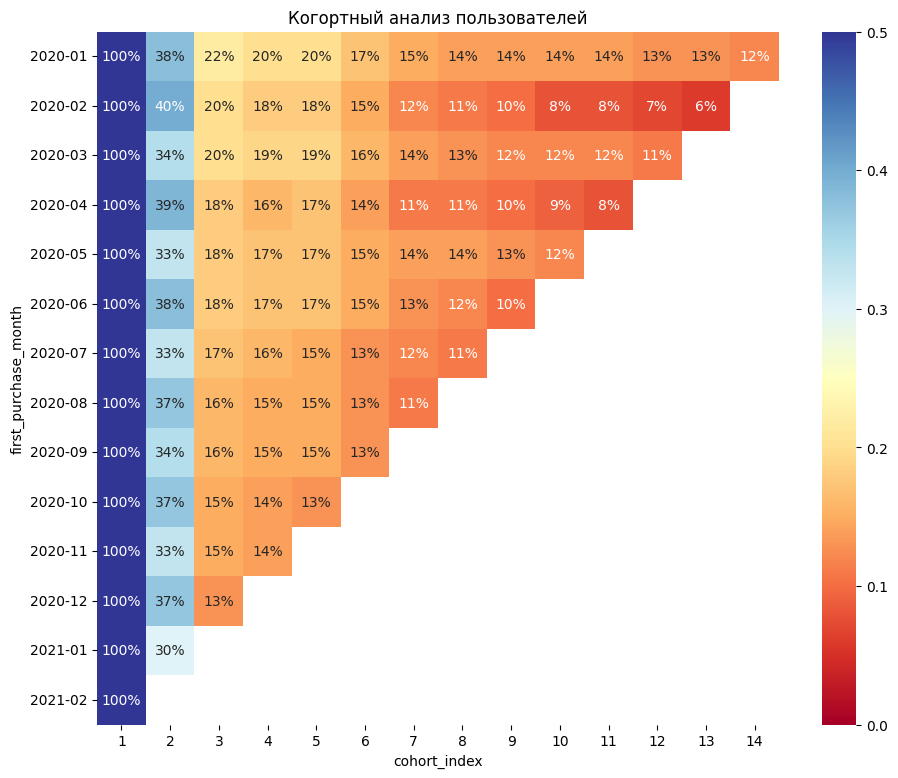

In [65]:
plt.figure(figsize=(11,9))
plt.title('Когортный анализ пользователей')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="RdYlBu")
plt.show()

In [50]:
#Сумма покупок
sum_table=df.pivot_table(index='first_purchase_month',
                   columns='cohort_index',
                   values='price',
                   aggfunc=np.sum)
sum_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase_month,,,,,,,,,,,,,,
2020-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
first_column2=sum_table.iloc[:,0]
retention2=sum_table.div(first_column2,axis=0).round(2)
retention2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase_month,,,,,,,,,,,,,,
2020-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


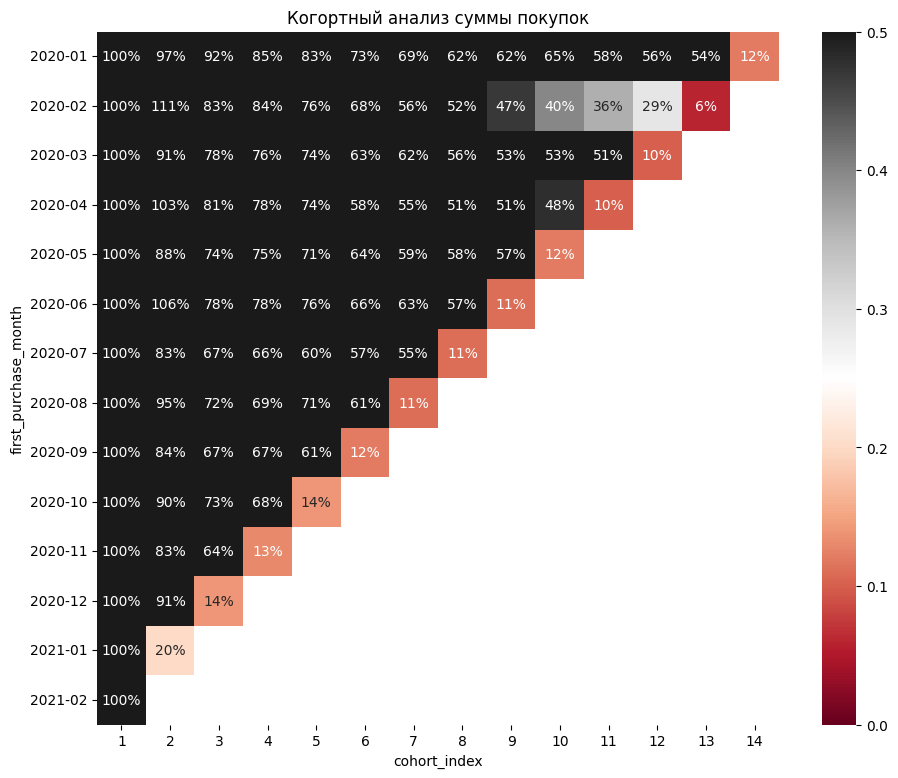

In [82]:
plt.figure(figsize=(11,9))
plt.title('Когортный анализ суммы покупок')
sns.heatmap(data=retention2,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="RdGy")
plt.show()

При анализе количества покупателей можно сделать вывод о низкой возвращаемости клиентов. На это могут влиять качество обслуживания и уровень удовлетворенности клиентов.

При анализе суммы покупок мы видим, что часто во втором месяце более высокая сумма покупок, чем в первом.Это может означать, что второй месяц после первой покупки является периодом, когда клиенты начинают понимать, какие товары иим нужны и как они могут использовать их наилучшим образом. Также это может быть связано с сезонностью или проведением маркетинговых акций в этот период.

Стоит обратить пристальное внимание на тех клиентов, которые пришли 02.2020. У этой группы самое резкое сокращение, как клиентов, так и суммы покупок. Здесь надо разобраться подробнее, что произошло.